In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

In [8]:
# right hand side of Laplace's equation
def g(x):
    return -np.cos(x) if -np.pi/2 <= x <= np.pi/2 else 0

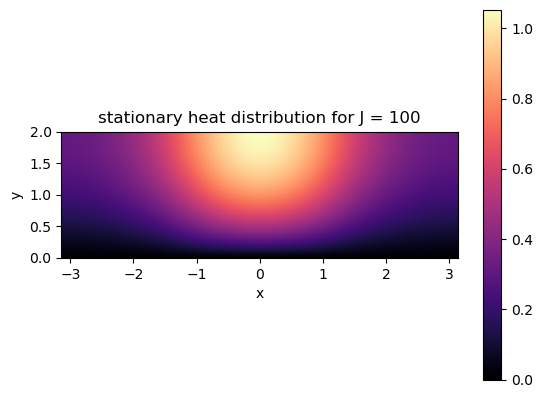

In [9]:
# set mesh size
J = 100
hx = 2*np.pi/J
hy = 2/J
a = 1/hx**2
b = 1/hy**2
c = a + b

# define block structure of A
v = b*np.ones(J)
v[1] = 2*b
T = spdiags([b*np.ones(J), -2*c*np.ones(J), v], [-1, 0, 1]).toarray()
S = spdiags([np.ones(J), np.ones(J), np.ones(J), np.ones(J)], [-J+1, -1, 1, J-1]).toarray()
A = np.kron(np.identity(J), T) + np.kron(S, a*np.identity(J))

# define f
f = np.zeros(J**2)
for j in range(J**2):
    f[j] = g(-np.pi + int(j/J)*hx)

# solve Au=f for u, convert u to 2d array, fill in BCs
u = np.linalg.solve(A, f)
u = np.reshape(u, (J, J), order = 'F')
u = np.pad(u, (0, 1))
for j in range(J):
    u[j][-1] = u[j][0]

# plot u
plt.title('stationary heat distribution for J = {}'.format(J))
plt.xlabel('x')
plt.ylabel('y')
im = plt.imshow(u, cmap = plt.cm.magma, extent = [-np.pi, np.pi, 0, 2])
plt.colorbar(im)
plt.savefig('hw6 2 plot.png')
plt.show()